In [1]:
from numpy import pi as PI
from data.dataset import MP3D
from data.patch_op import ToTangentPatch

In [2]:
ds = MP3D('train', dmax=10.0, crop_h=384)

In [3]:
tan_patch = ToTangentPatch(fov=9.0*PI/180.0, patch_dim=32, npatch=216, img_h=384, img_w=1024)
tan_patch = tan_patch.to('cuda:1')

In [4]:
x = ds[0][0].to('cuda:1')
img = tan_patch.tan_patch(x.unsqueeze(0))
img = tan_patch.scatter2d(img)

In [5]:
import torchvision.transforms as T
pilimg = T.ToPILImage()

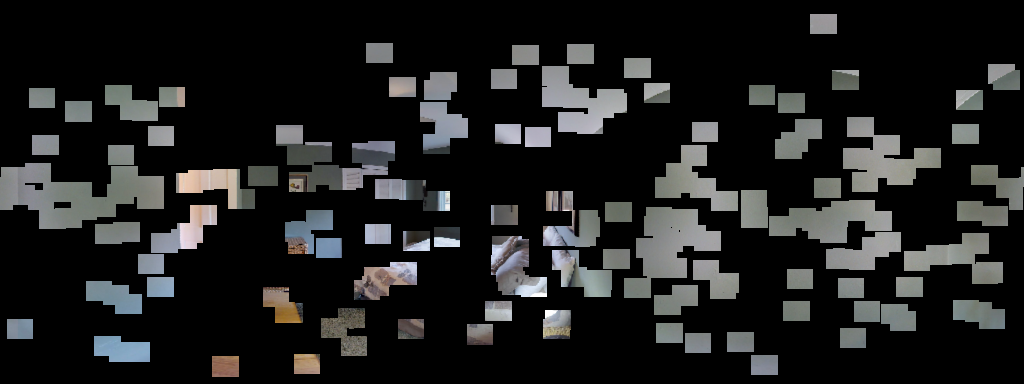

In [6]:
pilimg(img.squeeze(0))

---

In [1]:
from torchvision.transforms import ToPILImage
pilimg = ToPILImage()

In [ ]:
import trainer
from data.dataset import MP3D

In [ ]:
ckpt_path = '../lightning_logs/version_0/checkpoints/epoch=119-step=3599.ckpt'
pano_dpt = trainer.PanoDPT.load_from_checkpoint(ckpt_path)
pano_dpt.eval()

In [ ]:
ds = MP3D(mode='train', dmax=trainer.DMAX, crop_h=trainer.IMG_H)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
def to_dmap(img):
    img = img.to('cpu').squeeze(0)
    img /= img.max()
    img[img < 1e-5] = 1.0

    fig, ax = plt.subplots(figsize=[16, 32])
    ax.imshow(img, cmap='cividis_r')
    fig.show()

In [ ]:
x, gt = ds[5]
pilimg(x)

In [ ]:
pano_dpt = pano_dpt.to('cuda:1')
xb, gtb = map(lambda z: z.unsqueeze(0).to('cuda:1'), (x, gt))

In [ ]:
import torch

In [ ]:
with torch.no_grad():
    xb_n = pano_dpt.norm(xb)
    xb_patch, _ = pano_dpt.tan_patch(xb_n, gtb)
    pred = pano_dpt.model(xb_patch)

In [ ]:
to_dmap(gtb)

In [ ]:
to_dmap(pred)

In [ ]:
img = pano_dpt.tan_patch.tan_patch(xb)
img = pano_dpt.tan_patch.scatter2d(img)

In [ ]:
pilimg(xb[0, ...])

In [ ]:
pilimg(img[0, ...])

---

In [ ]:
from data.patch_op import *

In [ ]:
from numpy import pi as PI

In [ ]:
from torch import nn

In [ ]:
class M(nn.Module):
    def __init__(self):
        super().__init__()
        x_grid, y_grid = polar_coord_grid(5*PI/180, 16, 864)
        self.tan_patch = TangentPatch(x_grid, y_grid)
    def __call__(self, xb):
        xb = self.tan_patch(xb)
        return xb

In [ ]:
m = M()

In [ ]:
import torch
x = torch.rand(1, 3, 400, 1024, device='cuda:0')
m = m.to('cuda:0')
z = m(x)

---

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import torchvision.transforms as T
pilimg = T.ToPILImage()

In [ ]:
from data.dataset import MP3D
ds = MP3D(mode='train', dmax=10, crop_h=400)

In [ ]:
ds[0][0].shape

In [ ]:
x, y = ds[0]
pilimg(x)

In [ ]:
from functools import partial
from torch.utils.data import DataLoader

In [ ]:
dl = partial(DataLoader, batch_size=4, num_workers=4, pin_memory=True)
train_dl = dl(MP3D('train', dmax=10, crop_h=400))

In [ ]:
xb, yb = next(iter(train_dl))
xb.shape